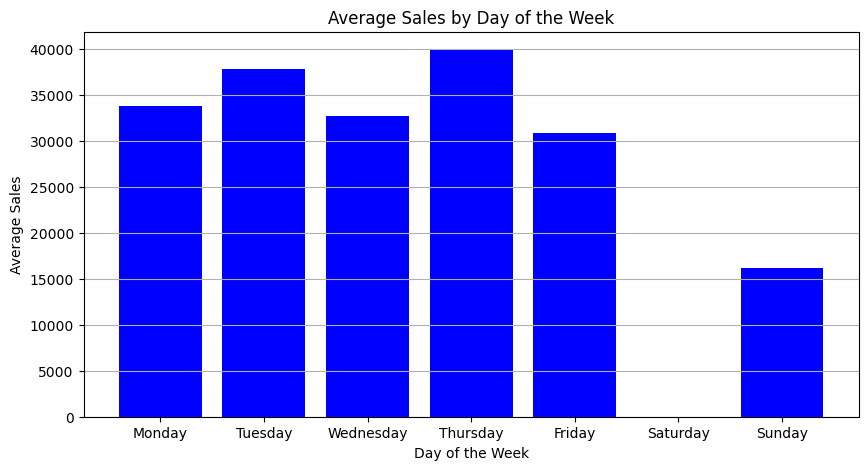

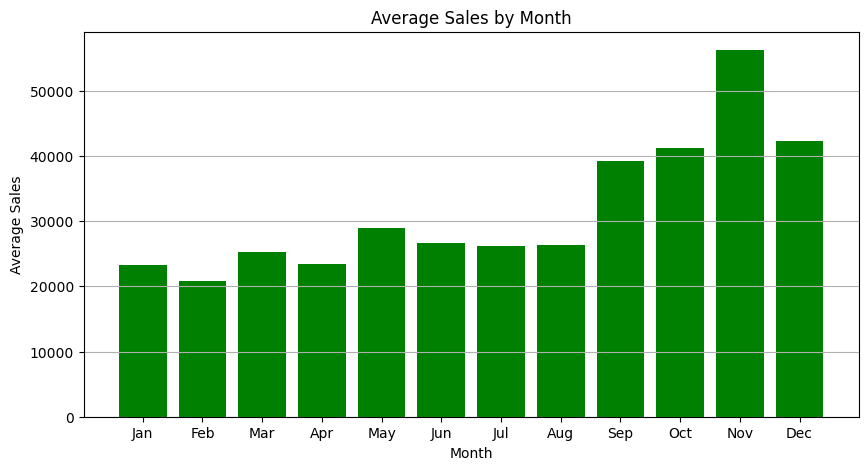

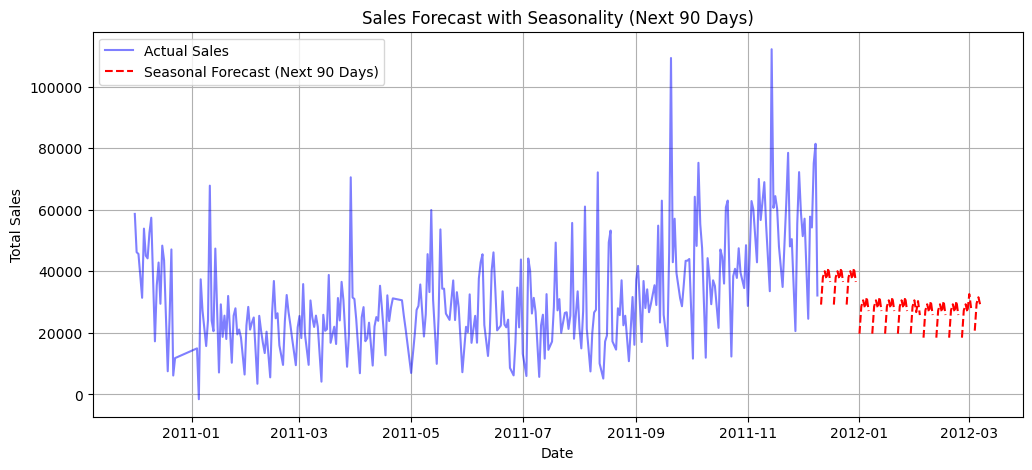

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("data.csv")

# Convert 'InvoiceDate' to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Revenue per transaction
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]

# Aggregate Sales Data by Date
daily_sales = df.groupby(df["InvoiceDate"].dt.date)["TotalSales"].sum().reset_index()
daily_sales["InvoiceDate"] = pd.to_datetime(daily_sales["InvoiceDate"])  # Convert back to datetime

# Seasonality - Add Day of the Week & Month Columns
daily_sales["DayOfWeek"] = daily_sales["InvoiceDate"].dt.day_name()  # Monday, Tuesday, etc.
daily_sales["Month"] = daily_sales["InvoiceDate"].dt.month  # 1 = January, 12 = December

# Plot Sales by Day of the Week
weekly_sales = daily_sales.groupby("DayOfWeek")["TotalSales"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(10, 5))
plt.bar(weekly_sales.index, weekly_sales.values, color="blue")
plt.title("Average Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Sales")
plt.grid(axis="y")
plt.show()

# Plot Sales by Month (Seasonality)
monthly_sales = daily_sales.groupby("Month")["TotalSales"].mean()

plt.figure(figsize=(10, 5))
plt.bar(monthly_sales.index, monthly_sales.values, color="green")
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(axis="y")
plt.show()

# Forecast Next 90 Days Based on Seasonal Trends
future_dates = pd.date_range(start=daily_sales["InvoiceDate"].max(), periods=90, freq="D")
future_df = pd.DataFrame({"InvoiceDate": future_dates})
future_df["DayOfWeek"] = future_df["InvoiceDate"].dt.day_name()
future_df["Month"] = future_df["InvoiceDate"].dt.month

# Predict Sales Using Historical Seasonal Averages
future_df["PredictedSales"] = future_df["DayOfWeek"].map(weekly_sales) * 0.5 + future_df["Month"].map(monthly_sales) * 0.5

# Plot Forecasted Sales vs. Actual Sales
plt.figure(figsize=(12, 5))
plt.plot(daily_sales["InvoiceDate"], daily_sales["TotalSales"], label="Actual Sales", color="blue", alpha=0.5)
plt.plot(future_df["InvoiceDate"], future_df["PredictedSales"], label="Seasonal Forecast (Next 90 Days)", color="red", linestyle="dashed")
plt.title("Sales Forecast with Seasonality (Next 90 Days)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.legend()
plt.grid(True)
plt.show()
